In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sb

In [4]:
import matplotlib.pyplot as plt

In [27]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [5]:
%matplotlib inline

In [6]:
train=pd.read_csv("C:\\Users\\raksh\\OneDrive\\Desktop\\Kaggle\\Digit Recognizer\\train.csv")

In [7]:
test=pd.read_csv("C:\\Users\\raksh\\OneDrive\\Desktop\\Kaggle\\Digit Recognizer\\test.csv")

In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

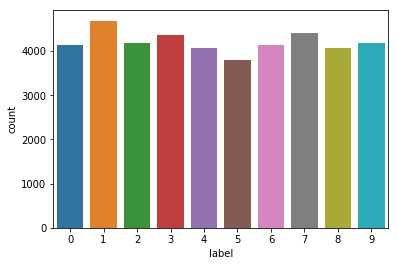

In [11]:
labeldesc=sb.countplot(train['label'])

In [12]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [13]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [14]:
test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [15]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [16]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [17]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [18]:
Y_train=train['label']

In [19]:
X_train = train.drop(labels = ["label"],axis = 1)

In [20]:
X_train=X_train/255.0

In [21]:
test=test/255.0

In [22]:
X_train = X_train.values.reshape(-1,28,28,1)

In [23]:
X_train

array([[[[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        ..., 
        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]]],


       [[[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
 

In [24]:
test = test.values.reshape(-1,28,28,1)

In [25]:
test

array([[[[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        ..., 
        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]]],


       [[[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
 

In [28]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [30]:
random_seed=3

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [32]:
from keras.models import Sequential

In [33]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))

In [36]:
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))

In [37]:
model.add(MaxPool2D(pool_size=(2,2)))

In [38]:
model.add(Dropout(0.25))

In [39]:
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))

In [40]:
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))

In [41]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [42]:
model.add(Dropout(0.25))

In [43]:
model.add(Flatten())

In [44]:
model.add(Dense(256, activation = "relu"))

In [45]:
model.add(Dropout(0.5))

In [46]:
model.add(Dense(10, activation = "softmax"))

In [47]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
from keras.preprocessing.image import ImageDataGenerator

In [50]:
datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,
                             samplewise_std_normalization=False, zca_whitening=False,rotation_range=10, zoom_range = 0.1,
                             width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False, vertical_flip=False)

In [51]:
datagen.fit(X_train)

In [53]:
from keras.callbacks import ReduceLROnPlateau

In [54]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [56]:
epochs = 5

In [57]:
batch_size = 86

In [58]:
preds= model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size, callbacks=[learning_rate_reduction])

Epoch 1/5
 - 359s - loss: 0.0725 - acc: 0.9743 - val_loss: 0.0149 - val_acc: 0.9950
Epoch 2/5
 - 351s - loss: 0.0264 - acc: 0.9912 - val_loss: 0.0089 - val_acc: 0.9968
Epoch 3/5
 - 348s - loss: 0.0197 - acc: 0.9935 - val_loss: 0.0084 - val_acc: 0.9972
Epoch 4/5
 - 348s - loss: 0.0166 - acc: 0.9946 - val_loss: 0.0067 - val_acc: 0.9975
Epoch 5/5
 - 347s - loss: 0.0145 - acc: 0.9952 - val_loss: 0.0053 - val_acc: 0.9983


In [62]:
Y_pred = model.predict(X_val)

In [68]:
Y_pred = np.argmax(Y_pred,axis = 1)

In [69]:
Y_val = np.argmax(Y_val,axis = 1) 

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
cm = confusion_matrix(Y_val, Y_pred)

In [72]:
cm

array([[435,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 426,   1,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0, 378,   0,   1,   0,   0,   1,   1,   0],
       [  0,   0,   0, 441,   0,   5,   0,   0,   1,   1],
       [  0,   0,   0,   0, 408,   0,   2,   0,   0,   3],
       [  0,   0,   0,   2,   0, 381,   1,   1,   2,   2],
       [  0,   0,   0,   1,   0,   0, 404,   0,   1,   0],
       [  0,   0,   0,   1,   1,   0,   0, 461,   1,   0],
       [  0,   1,   0,   0,   1,   1,   0,   0, 397,   1],
       [  1,   0,   0,   0,   1,   1,   0,   0,   1, 431]], dtype=int64)

In [75]:
import itertools

In [76]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

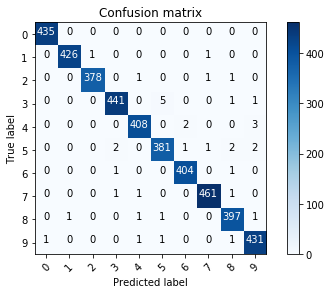

In [77]:
plot_confusion_matrix(cm, classes = range(10)) 